In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image
from multiprocessing.dummy import Pool


In [2]:
IMAGES_PATH = glob.glob('./train/train/**/**.**', recursive=True, )
pool = Pool(12)


In [3]:
def get_metadata(path):
    img = Image.open(path)

    return [img.mode, img.format, img.width, img.height, img.width / img.height]


In [4]:
metadata = pool.map(get_metadata, IMAGES_PATH)
pool.close()
pool.join()


In [5]:
df = pd.DataFrame(metadata, columns=['mode', 'format', 'width', 'height', 'aspect_ratio'])
df


,mode,format,width,height,aspect_ratio
0,RGB,JPEG,871,871,1.0
1,RGB,JPEG,800,800,1.0
2,RGB,JPEG,400,400,1.0
3,RGB,JPEG,872,872,1.0
4,RGB,JPEG,800,800,1.0
...,...,...,...,...,...
105393,RGB,JPEG,1024,1024,1.0
105394,RGB,JPEG,700,700,1.0
105395,RGB,JPEG,640,640,1.0
105396,RGB,JPEG,600,600,1.0


## Mode

In [6]:
img_mode = df['mode'].unique()
print(f'Image mode : {img_mode}')
for m in img_mode:
    print(f'Total image with mode {m} : {sum(df["mode"] == m)}')


Image mode : ['RGB' 'RGBA']
Total image with mode RGB : 105391
Total image with mode RGBA : 7


## Format

In [7]:
img_format = df['format'].unique()
print(f'Image format : {img_format}')
for m in img_format:
    print(f'Total image with format {m} : {sum(df["format"] == m)}')


Image format : ['JPEG' 'PNG']
Total image with format JPEG : 105372
Total image with format PNG : 26


## Aspect Ratio

In [8]:
print(f'Total images with aspect ratio 1.0: {sum(df["aspect_ratio"] == 1.0)}')
print(f'Total images without aspect ratio 1.0: {sum(df["aspect_ratio"] != 1.0)}')
df[df['aspect_ratio'] != 1.0 ]


Total images with aspect ratio 1.0: 105362
Total images without aspect ratio 1.0: 36


,mode,format,width,height,aspect_ratio
455,RGB,JPEG,640,611,1.047463
2143,RGB,JPEG,568,640,0.887500
5596,RGB,JPEG,426,640,0.665625
12462,RGB,JPEG,553,640,0.864062
15280,RGB,JPEG,512,640,0.800000
16759,RGB,JPEG,512,640,0.800000
17070,RGB,JPEG,640,480,1.333333
18156,RGB,JPEG,640,637,1.004710
18564,RGB,JPEG,638,640,0.996875
21537,RGB,JPEG,639,640,0.998437


## Width

In [9]:
print(f'Mean width : {df["width"].mean()}')


Mean width : 709.6090722784113


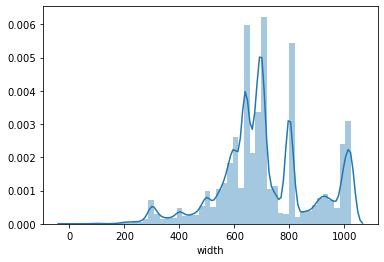

In [10]:
sns.distplot(df['width'], norm_hist=False)
